# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import data

In [3]:
dataset = pd.read_csv('pitches_c.csv')
dataset = dataset.iloc[np.random.permutation(dataset.index)[0:100000], ]

# Preprocessing

In [10]:
#remove row with NAN
dataset.dropna(inplace=True)

#remove irrelevent Pitch types
Pre = dataset.drop(dataset[dataset.pitch_type.isin(["UN", "PO","FO","EP","IN","SC","AB"])].index)

#remove type confidence lower than 0.8
indexNames = Pre[ Pre['type_confidence'] < 0.8 ].index
Pre.drop(indexNames , inplace=True)

#remove irrelevent column
Pre = Pre.drop([ 'sz_bot', 'sz_top', 'type_confidence', 'code', 'type', 'event_num', 'b_score', 'ab_id', 'b_count', 's_count',
 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b','zone'], axis = 1)

In [6]:
Pre.groupby(['pitch_type']).mean()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
pitch_type,,,,,,,,,,,,,,,,,,,,,
CH,-0.094910,1.868005,83.831956,77.313597,1750.829069,200.384739,6.293446,7.628547,23.824893,-3.403362,...,295.625280,2.186953,2.016627e+09,0.924486,0.964686,1.011907,3.042337,0.306839,0.185732,0.093731
CU,0.035728,1.896278,77.812403,71.953420,1266.117032,123.227841,-5.415727,12.367114,23.841734,3.583536,...,291.447130,2.137067,2.016636e+09,0.677279,1.007672,1.019307,2.822913,0.271065,0.188978,0.093722
FC,0.178569,2.270208,88.255687,81.693781,1145.899962,167.899257,-4.875466,5.875908,23.848485,1.660383,...,324.070812,2.203410,2.016615e+09,0.906720,0.884052,1.004614,2.927583,0.309930,0.191575,0.099298
FF,-0.012165,2.608257,92.900361,85.192663,2165.789603,191.310936,10.969296,3.983899,23.795517,-3.794547,...,318.452241,2.276603,2.016623e+09,0.935631,0.840647,0.963848,2.899805,0.300586,0.173743,0.088618
FS,-0.228503,1.654596,84.706598,78.249278,1432.845347,225.211968,13.186186,7.849966,23.834983,-7.304261,...,319.384192,2.185567,2.016600e+09,0.929210,1.142268,1.032990,3.257045,0.284536,0.215120,0.093471
FT,-0.149168,2.342171,92.236312,84.710830,2172.791969,205.046000,15.852005,5.863472,23.803751,-7.359151,...,274.807178,1.924809,2.016638e+09,0.931629,0.751189,0.931718,2.790040,0.335307,0.171467,0.090175
KC,0.079474,1.817498,80.373155,74.260677,1297.502827,104.685493,-6.344200,11.954482,23.837390,4.319053,...,305.311951,1.923111,2.016648e+09,0.727592,1.000879,1.011424,2.871265,0.286907,0.197276,0.098858
KN,0.097200,2.559025,75.807278,69.370620,871.233857,191.205957,0.457951,10.193531,23.773046,-0.495142,...,225.123989,1.512129,2.016157e+09,0.768194,0.878706,1.002695,2.773585,0.315364,0.175202,0.094340
SI,-0.095348,2.320664,91.453508,84.015313,2102.661639,201.471655,8.979979,6.362512,23.801189,-4.917206,...,332.479637,2.370763,2.016510e+09,0.891949,0.733757,0.951507,2.725636,0.319444,0.178084,0.091690


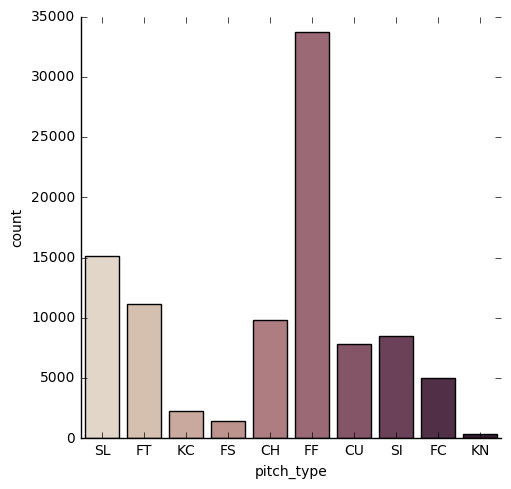

In [7]:
#Visualize pitch type
sns.catplot(x="pitch_type", kind="count", palette="ch:.25", data=Pre);
plt.show()

In [11]:
#Export preprocessed data
export_csv = Pre.to_csv (r'D:\MySQL\mlb-pitch-data-20152018\preprocessed_data.csv', index = None, header=True)